In [1]:
from func import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_df = load_csvs_from_ftp_to_df()
raw_df.info()

C:\My_Programs\Python_Project\IDX_Intern\func.py:67: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(bio, **pandas_read_csv_kwargs)


<class 'pandas.core.frame.DataFrame'>
Index: 68493 entries, 3 to 134260
Data columns (total 78 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BuyerAgentAOR                 68482 non-null  object 
 1   ListAgentAOR                  68482 non-null  object 
 2   Flooring                      44600 non-null  object 
 3   ViewYN                        61985 non-null  object 
 4   WaterfrontYN                  27 non-null     object 
 5   BasementYN                    1687 non-null   object 
 6   PoolPrivateYN                 63200 non-null  object 
 7   OriginalListPrice             68352 non-null  float64
 8   ListingKey                    68493 non-null  int64  
 9   ListAgentEmail                68260 non-null  object 
 10  CloseDate                     68493 non-null  object 
 11  ClosePrice                    68493 non-null  float64
 12  ListAgentFirstName            68002 non-null  object 
 13  ListA

In [3]:
# # Remove PropertyType and PropertySubType
# raw_df = raw_df.drop(columns=["PropertyType", "PropertySubType"])
# # Remove entries with non-positive close price
# raw_df = raw_df[raw_df["ClosePrice"] > 0]
# # Remove columns with 0 non-null value
# raw_df = raw_df.dropna(axis=1, how="all")
# # Convert the dtype of CloseDate
# raw_df["CloseDate"] = pd.to_datetime(raw_df["CloseDate"])
# # Remove agent and office name
# raw_df = raw_df.drop(columns=[
#     "ListAgentFirstName",
#     "ListAgentLastName",
#     "ListAgentFullName",
#     "CoListAgentFirstName",
#     "CoListAgentLastName",
#     "BuyerAgentFirstName",
#     "BuyerAgentLastName",
#     "CoBuyerAgentFirstName",
# ])
# # Remove id
# raw_df = raw_df.drop(columns=[
#     "BuyerAgentMlsId",
#     "ListingId",
#     "ListingKey",
#     "ListingKeyNumeric",
# ])
# # Extract Email Domains
# # Extract only the domain from email addresses (e.g., gmail.com, yahoo.com)
#
# # Extract email domain (part after @)
# raw_df["EmailDomain"] = raw_df["ListAgentEmail"].str.split("@").str[1]
#
# raw_df = raw_df.drop(columns=[
#     "ListAgentEmail"
# ])

In [4]:
# simple pre-processed
processed_df = pre_process(raw_df)

In [5]:
print(processed_df.describe()["ClosePrice"])
close_price = processed_df["ClosePrice"]
log_close_price = np.log(close_price)
processed_df["logClosePrice"] = log_close_price
processed_df.info()

count    6.849200e+04
mean     1.350624e+06
std      9.033294e+06
min      4.850000e+02
25%      6.260000e+05
50%      8.900000e+05
75%      1.407000e+06
max      9.895000e+08
Name: ClosePrice, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 68492 entries, 3 to 134260
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   BuyerAgentAOR             68481 non-null  category
 1   ListAgentAOR              68481 non-null  category
 2   Flooring                  44599 non-null  category
 3   ViewYN                    61984 non-null  category
 4   PoolPrivateYN             63199 non-null  category
 5   OriginalListPrice         68351 non-null  float64 
 6   CloseDate                 68492 non-null  category
 7   ClosePrice                68492 non-null  float64 
 8   Latitude                  68488 non-null  float64 
 9   Longitude                 68488 non-null  float64 
 10  UnparsedA


# 1. ClosePrice


## 1.1 Distribution

In [6]:
Q1 = close_price.quantile(0.25)
Q3 = close_price.quantile(0.75)
IQR = Q3 - Q1
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

log_Q1 = log_close_price.quantile(0.25)
log_Q3 = log_close_price.quantile(0.75)
log_IQR = log_Q3 - log_Q1
log_IQR = log_Q3 - log_Q1
log_lower = log_Q1 - 1.5 * log_IQR
log_upper = log_Q3 + 1.5 * log_IQR

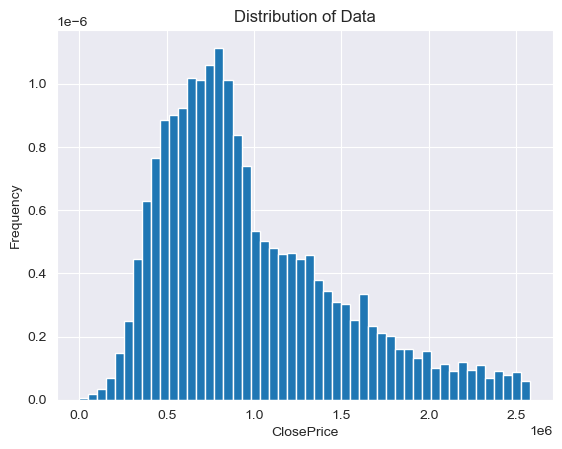

In [7]:
# Show distribution of data within certain range
xmin = lower
xmax = upper
x_filtered = close_price[(close_price >= xmin) & (close_price <= xmax)]
plt.hist(x_filtered, bins=50, density=True)
plt.xlabel("ClosePrice")
plt.ylabel("Frequency")
plt.title("Distribution of Data")
plt.grid(True)

plt.show()

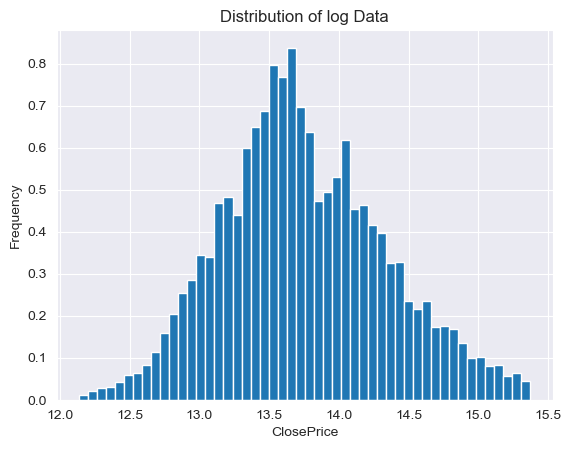

In [8]:
log_xmin = log_lower
log_xmax = log_upper
log_x_filtered = log_close_price[(log_close_price >= log_xmin) & (log_close_price <= log_xmax)]
plt.hist(log_x_filtered, bins=50, density=True)
plt.xlabel("ClosePrice")
plt.ylabel("Frequency")
plt.title("Distribution of log Data")
plt.grid(True)

plt.show()


## 1.2 price by date

In [9]:
median_df = (
    processed_df.groupby("CloseDate", as_index=False)["logClosePrice"]
    .median()
)

avg_df = (
    processed_df.groupby("CloseDate", as_index=False)["logClosePrice"]
    .mean()
)

C:\Users\lee39\AppData\Local\Temp\ipykernel_5728\1957720164.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  processed_df.groupby("CloseDate", as_index=False)["logClosePrice"]
C:\Users\lee39\AppData\Local\Temp\ipykernel_5728\1957720164.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  processed_df.groupby("CloseDate", as_index=False)["logClosePrice"]


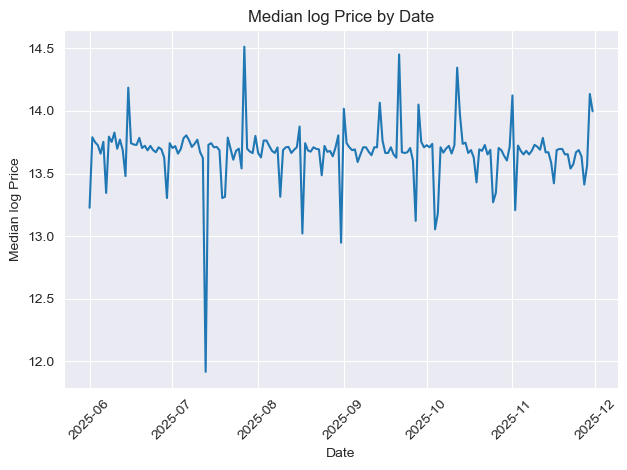

In [10]:
plt.figure()
plt.plot(median_df["CloseDate"], median_df["logClosePrice"])
plt.xlabel("Date")
plt.ylabel("Median log Price")
plt.title("Median log Price by Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

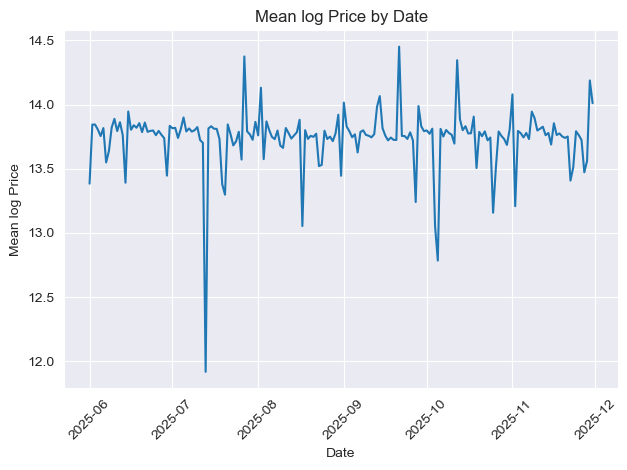

In [11]:
plt.figure()
plt.plot(avg_df["CloseDate"], avg_df["logClosePrice"])
plt.xlabel("Date")
plt.ylabel("Mean log Price")
plt.title("Mean log Price by Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

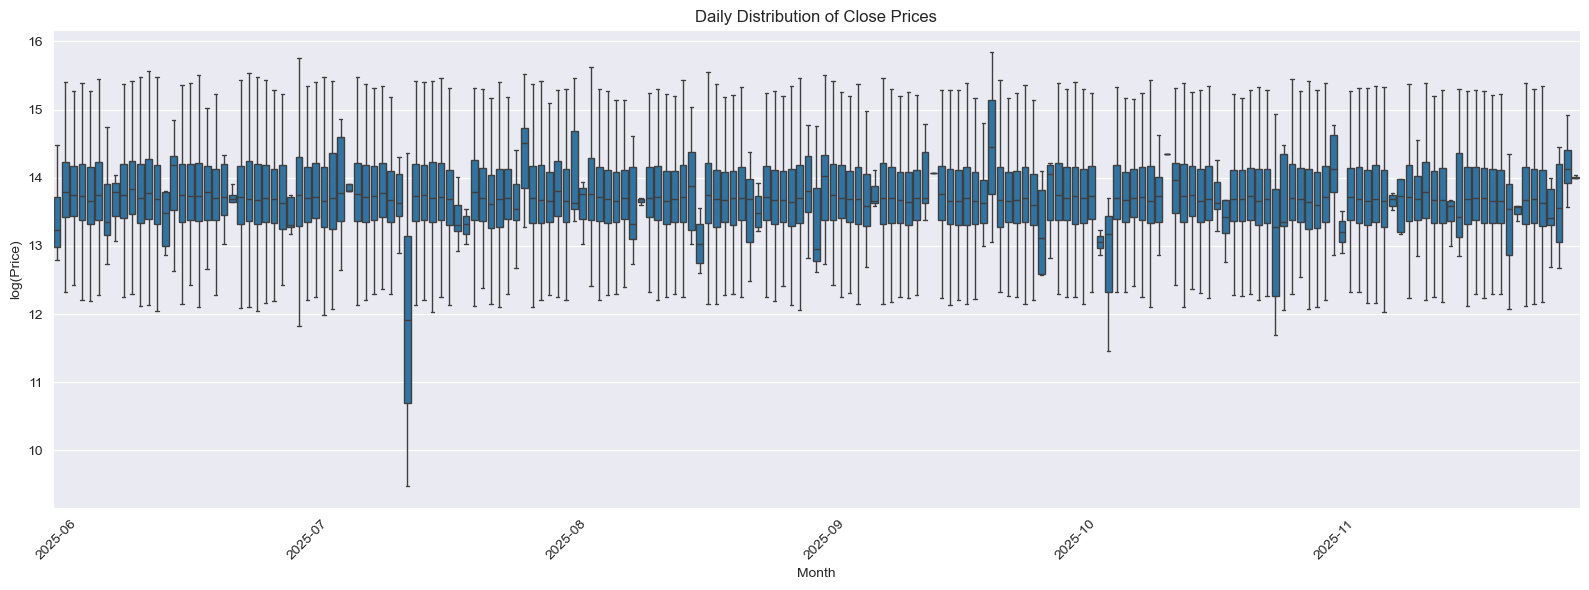

In [12]:
dist_df = pd.DataFrame()
dist_df["day_bucket"] = processed_df["CloseDate"].dt.date
dist_df["month_bucket"] = processed_df["CloseDate"].dt.to_period("M").astype(str)
dist_df["logClosePrice"] = processed_df["logClosePrice"]
dist_df["CloseDate"] = processed_df["CloseDate"]
order = sorted(dist_df["day_bucket"].unique())

fig, ax = plt.subplots(figsize=(16, 6))

sns.boxplot(
    data=dist_df,
    x="day_bucket",
    y="logClosePrice",
    order=order,
    showfliers=False,
    ax=ax
)
# map day -> month
day_to_month = (
    dist_df.drop_duplicates("day_bucket")
    .set_index("day_bucket")["month_bucket"]
)

ticks = []
labels = []
last = None

for i, d in enumerate(order):
    m = day_to_month[d]
    if m != last:
        ticks.append(i)
        labels.append(m)
        last = m

ax.set_xticks(ticks)
ax.set_xticklabels(labels, rotation=45)

ax.set_xlabel("Month")
ax.set_ylabel("log(Price)")
ax.set_title("Daily Distribution of Close Prices")
plt.tight_layout()
plt.show()


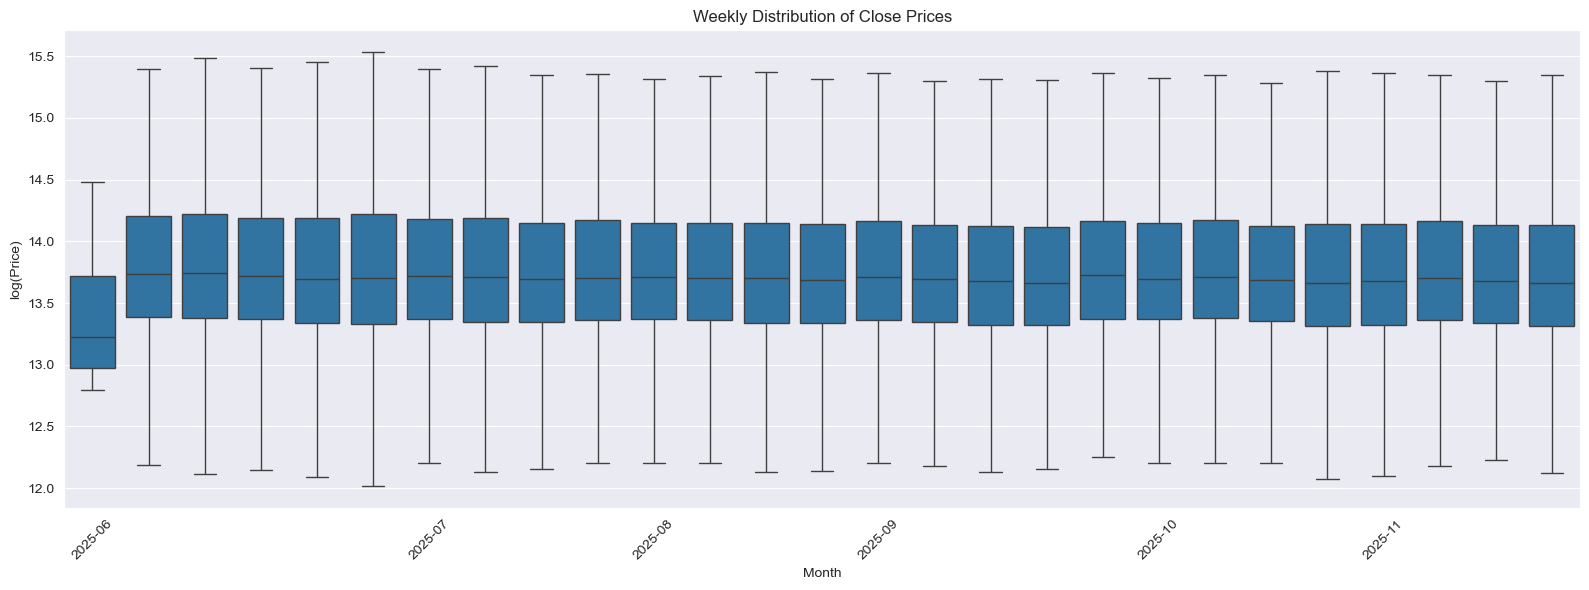

In [13]:
dist_df["week_bucket"] = dist_df["CloseDate"].dt.to_period("W").astype(str)
order = sorted(dist_df["week_bucket"].unique())

fig, ax = plt.subplots(figsize=(16, 6))
sns.boxplot(
    data=dist_df,
    x="week_bucket",
    y="logClosePrice",
    order=order,
    showfliers=False,
    ax=ax
)

week_to_month = (
    dist_df.drop_duplicates("week_bucket")
    .set_index("week_bucket")["month_bucket"]
)

ticks, labels = [], []
last = None
for i, w in enumerate(order):
    m = week_to_month[w]
    if m != last:
        ticks.append(i)
        labels.append(m)
        last = m

ax.set_xticks(ticks)
ax.set_xticklabels(labels, rotation=45)

ax.set_xlabel("Month")
ax.set_ylabel("log(Price)")
ax.set_title("Weekly Distribution of Close Prices")
plt.tight_layout()
plt.show()


## 1.3 price by location

C:\Users\lee39\AppData\Local\Temp\ipykernel_5728\3341837855.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  processed_df.groupby("CountyOrParish")["logClosePrice"]


<Axes: xlabel='logClosePrice', ylabel='CountyOrParish'>

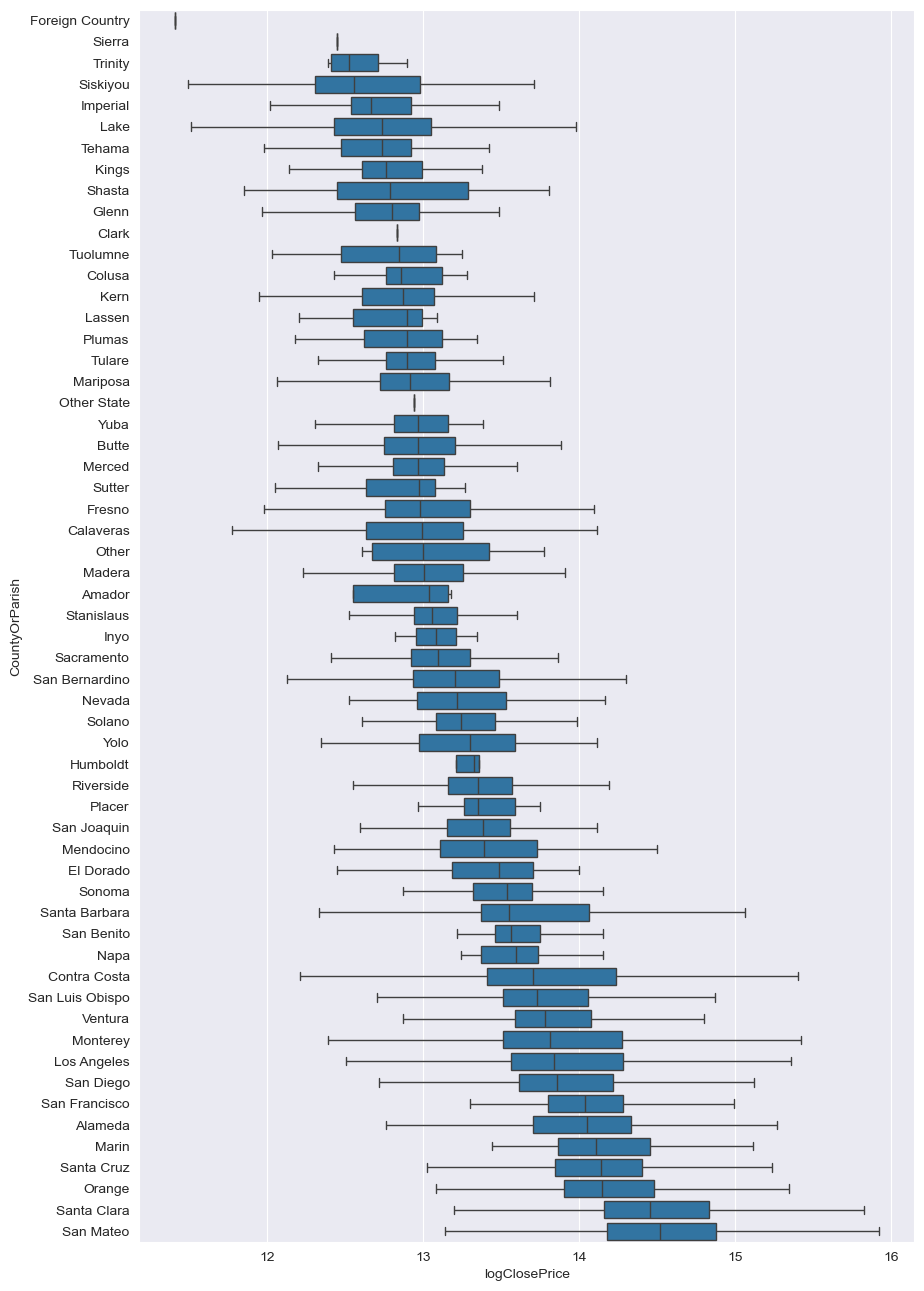

In [14]:
order = (
    processed_df.groupby("CountyOrParish")["logClosePrice"]
    .median()
    .sort_values()
    .index
)

height = 0.25 * len(processed_df["CountyOrParish"].unique())
plt.figure(figsize=(10, 16))

sns.boxplot(
    data=processed_df,
    y='CountyOrParish',
    x='logClosePrice',
    order=order,
    showfliers=False
)

## 2. Quality

In [15]:
data_quality_summary(processed_df)

,column,dtype,n_unique,missing_%,outlier_%
36,BelowGradeFinishedArea,float64,44,99.29,0.00
23,BuilderName,category,821,95.44,NaN
43,LotSizeDimensions,category,2857,93.55,NaN
31,BuildingAreaTotal,float64,2581,93.29,5.98
20,ElementarySchool,category,1125,86.85,NaN
38,MiddleOrJuniorSchool,category,587,86.64,NaN
41,HighSchool,category,477,82.71,NaN
17,AssociationFeeFrequency,category,4,75.09,NaN
16,CoListOfficeName,category,2353,73.37,NaN
25,SubdivisionName,category,5657,64.62,NaN


## 3. Correlation

In [16]:
numeric_cols = list(processed_df.select_dtypes(include=["number"]).columns)
categorical_cols = [c for c in processed_df.columns if c not in numeric_cols]

numeric_corr = processed_df[numeric_cols].corr()
numeric_corr

,OriginalListPrice,ClosePrice,Latitude,Longitude,LivingArea,ListPrice,DaysOnMarket,ParkingTotal,LotSizeAcres,YearBuilt,...,BuildingAreaTotal,BedroomsTotal,BelowGradeFinishedArea,Stories,LotSizeArea,MainLevelBedrooms,GarageSpaces,AssociationFee,LotSizeSquareFeet,logClosePrice
OriginalListPrice,1.000000,0.029079,-0.000898,-0.010064,0.109020,0.171791,0.017784,0.058062,0.000874,0.002315,...,0.184990,0.049550,0.517677,0.026320,0.010356,-0.006882,0.008116,0.059148,0.000504,0.116383
ClosePrice,0.029079,1.000000,-0.009986,-0.005394,0.112347,0.171297,0.012082,0.006382,0.001095,-0.002754,...,0.641197,0.063566,0.531690,0.023383,0.192391,-0.013842,0.007506,0.025636,0.001493,0.230484
Latitude,-0.000898,-0.009986,1.000000,-0.544034,-0.061351,-0.031003,-0.016495,-0.038074,-0.004297,-0.075797,...,-0.007611,-0.051478,-0.014134,-0.038134,0.029790,0.097244,-0.030863,0.000427,-0.004301,-0.053926
Longitude,-0.010064,-0.005394,-0.544034,1.000000,0.027294,-0.038632,0.043624,0.021191,0.003989,0.110016,...,-0.103227,0.018530,0.014939,0.001217,-0.011291,-0.030863,0.019088,-0.008216,0.003882,-0.088297
LivingArea,0.109020,0.112347,-0.061351,0.027294,1.000000,0.647672,0.148780,0.067020,0.014027,0.346406,...,1.000000,0.657077,0.445380,0.437501,0.086343,-0.119758,0.122975,0.249034,0.007472,0.581929
ListPrice,0.171791,0.171297,-0.031003,-0.038632,0.647672,1.000000,0.077379,0.035874,0.005548,0.026246,...,0.827936,0.315772,0.516867,0.194001,0.061109,-0.075046,0.052898,0.279094,0.004522,0.691217
DaysOnMarket,0.017784,0.012082,-0.016495,0.043624,0.148780,0.077379,1.000000,0.015123,0.006540,0.128704,...,0.256926,0.042787,0.073470,0.053557,0.086626,-0.040886,0.004854,0.076801,-0.005866,-0.053421
ParkingTotal,0.058062,0.006382,-0.038074,0.021191,0.067020,0.035874,0.015123,1.000000,0.000807,0.041493,...,0.346093,0.047469,0.115338,0.014756,0.019779,0.008228,0.791126,0.010262,0.000656,0.034438
LotSizeAcres,0.000874,0.001095,-0.004297,0.003989,0.014027,0.005548,0.006540,0.000807,1.000000,0.010776,...,0.055100,0.004579,0.095431,-0.005708,0.009167,0.003344,0.002340,0.078513,1.000000,0.001596
YearBuilt,0.002315,-0.002754,-0.075797,0.110016,0.346406,0.026246,0.128704,0.041493,0.010776,1.000000,...,0.302062,0.280443,0.040206,0.324040,0.033460,-0.216005,0.099160,0.167803,0.002879,-0.037306


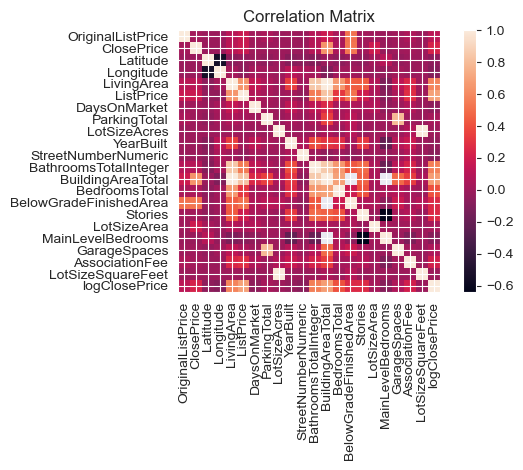

In [17]:
plt.figure()
plt.imshow(numeric_corr)
plt.colorbar()
plt.xticks(range(len(numeric_corr)), numeric_corr.columns, rotation=90)
plt.yticks(range(len(numeric_corr)), numeric_corr.columns)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [19]:
numeric_corr[["ClosePrice", "logClosePrice"]].sort_values(by="logClosePrice", key=lambda x: x.abs(), ascending=False)

,ClosePrice,logClosePrice
logClosePrice,0.230484,1.000000
ListPrice,0.171297,0.691217
BuildingAreaTotal,0.641197,0.675167
LivingArea,0.112347,0.581929
BathroomsTotalInteger,0.094345,0.560480
BedroomsTotal,0.063566,0.403287
Stories,0.023383,0.265486
BelowGradeFinishedArea,0.531690,0.257770
ClosePrice,1.000000,0.230484
AssociationFee,0.025636,0.207834
